In [ ]:
## This network can detect disguise face with accuracy rate 90.71

In [ ]:
#deepface model link 3rd step
## https://colab.research.google.com/drive/1KEA0o2Jtwswo2zOLLCFhkCf6swmMy4kt?usp=sharing

In [ ]:
!pip install git+https://github.com/google-research/tf-slim

  Cloning https://github.com/google-research/tf-slim to /tmp/pip-req-build-ammo_ll2
  Running command git clone -q https://github.com/google-research/tf-slim /tmp/pip-req-build-ammo_ll2
  Created wheel for tf-slim: filename=tf_slim-1.2.0-cp36-none-any.whl size=360912 sha256=5743749307c89a6db7e19a2ec106d33016bdc3e4092fb961eed363391b013499
  Stored in directory: /tmp/pip-ephem-wheel-cache-w2l4dhnq/wheels/bb/98/dc/eba6500d756d16f6ff371b39ed733d26cec1b0b0085e1cb0df
Successfully built tf-slim


In [ ]:
!pip install pycocotools


In [ ]:
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [ ]:
!pip install -U --pre tensorflow=="2.*"
!pip install pycocotools


In [ ]:
# %%bash
# cd '/content/drive/My Drive/practical(Needed)/python/Face Detect Distinguise Full'	
# python copy.py

In [ ]:
import os
import pathlib


if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models


Cloning into 'models'...
remote: Enumerating objects: 1927, done.
remote: Counting objects: 100% (1927/1927), done.
remote: Compressing objects: 100% (1683/1683), done.
remote: Total 1927 (delta 444), reused 765 (delta 226), pack-reused 0
Receiving objects: 100% (1927/1927), 30.09 MiB | 13.55 MiB/s, done.
Resolving deltas: 100% (444/444), done.


In [ ]:
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.


In [ ]:
%%bash
cd models/research
pip install .

Processing /content/models/research
  Created wheel for object-detection: filename=object_detection-0.1-cp36-none-any.whl size=1320621 sha256=e26b180e462b92fcefea0ec8bcd779eab30a50f6b727f9f43f1c848d6f275954
  Stored in directory: /tmp/pip-ephem-wheel-cache-5h3lt0gn/wheels/94/49/4b/39b051683087a22ef7e80ec52152a27249d1a644ccf4e442ea
Successfully built object-detection


In [ ]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
from IPython.display import display
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util
from tensorflow import keras

In [ ]:
# patch tf1 into `utils.ops`
utils_ops.tf = tf.compat.v1

# Patch the location of gfile
tf.gfile = tf.io.gfile

In [ ]:
# %%bash
# cd '/content/drive/My Drive/practical(Needed)/python/Face Detect Distinguise Full/Tensorflow/preprocess'
# python3 generate_tfrecord.py -x '/content/drive/My Drive/practical(Needed)/python/Face Detect Distinguise Full/testxml' -l '/content/drive/My Drive/practical(Needed)/python/Face Detect Distinguise Full/labels.pbtext' -o '/content/drive/My Drive/practical(Needed)/python/Face Detect Distinguise Full/Tensorflow/tfrecord/test.record' -i '/content/drive/My Drive/practical(Needed)/python/Face Detect Distinguise Full/test'

In [ ]:
# %%bash
# cd '/content/drive/My Drive/practical(Needed)/python/Face Detect Distinguise Full/Tensorflow/preprocess'
# python3 generate_tfrecord.py -x '/content/drive/My Drive/practical(Needed)/python/Face Detect Distinguise Full/trainxml' -l '/content/drive/My Drive/practical(Needed)/python/Face Detect Distinguise Full/labels.pbtext' -o '/content/drive/My Drive/practical(Needed)/python/Face Detect Distinguise Full/Tensorflow/tfrecord/train.record' -i '/content/drive/My Drive/practical(Needed)/python/Face Detect Distinguise Full/train'

In [ ]:
# import urllib.request
# urllib.request.urlretrieve ("http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet152_v1_640x640_coco17_tpu-8.tar.gz", "/content/drive/My Drive/practical(Needed)/python/Face Detect Distinguise Full/Tensorflow/mymodel/faster_rcnn_resnet152_v1_640x640_coco17_tpu-8.tar.gz")

In [ ]:
# %%bash 
# cd '/content/drive/My Drive/practical(Needed)/python/Face Detect Distinguise Full/Tensorflow/mymodel'
# tar -xvf faster_rcnn_resnet152_v1_640x640_coco17_tpu-8.tar.gz

In [ ]:
# %%bash
# cp '/content/drive/My Drive/practical(Needed)/python/Face Detect Distinguise Full/Tensorflow/mymodel/faster_rcnn_resnet152_v1_640x640_coco17_tpu-8/pipeline.config' '/content/drive/My Drive/practical(Needed)/python/Face Detect Distinguise Full/Tensorflow/frcnnresnet'

In [ ]:
# !cp '/content/models/research/object_detection/model_main_tf2.py' '/content/drive/My Drive/practical(Needed)/python/Face Detect Distinguise Full/Tensorflow'

In [ ]:
import os
os.environ['PYTHONPATH'] += ":/content/models"

import sys
sys.path.append("/content/models")

In [ ]:

# !python '/content/drive/My Drive/practical(Needed)/python/Face Detect Distinguise Full/Tensorflow/model_main_tf2.py' --model_dir='/content/drive/My Drive/practical(Needed)/python/Face Detect Distinguise Full/Tensorflow/frcnnresnet' --pipeline_config_path='/content/drive/My Drive/practical(Needed)/python/Face Detect Distinguise Full/Tensorflow/frcnnresnet/pipeline.config'


In [ ]:
# %%bash
# cp '/content/models/research/object_detection/exporter_main_v2.py' '/content/drive/My Drive/practical(Needed)/python/Face Detect Distinguise Full/Tensorflow'

In [ ]:
# !python '/content/drive/My Drive/practical(Needed)/python/Face Detect Distinguise Full/Tensorflow/exporter_main_v2.py' --input_type image_tensor --pipeline_config_path '/content/drive/My Drive/practical(Needed)/python/Face Detect Distinguise Full/Tensorflow/frcnnresnet/pipeline.config' --trained_checkpoint_dir '/content/drive/My Drive/practical(Needed)/python/Face Detect Distinguise Full/Tensorflow/frcnnresnet' --output_directory '/content/drive/My Drive/practical(Needed)/python/Face Detect Distinguise Full/Tensorflow/frcnnresnet/exported-model'


In [ ]:
import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = '/content/drive/My Drive/practical(Needed)/python/Face Detect Distinguise Full/Tensorflow/frcnnresnet/exported-model' + "/saved_model"

print('Loading model...', end='')
start_time = time.time()

# Load saved model and build the detection function
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

Loading model...Done! Took 41.35780596733093 seconds


In [ ]:
category_index = label_map_util.create_category_index_from_labelmap('/content/drive/My Drive/practical(Needed)/python/Face Detect Distinguise Full/labels.pbtext',
                                                                    use_display_name=True)

Running inference for /content/drive/My Drive/practical(Needed)/python/Face Detect Distinguise Full/test/1000.jpg... (640, 640, 3)


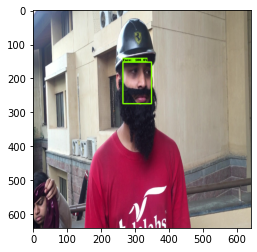

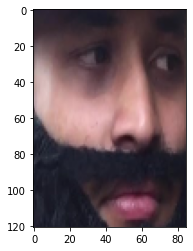

Running inference for /content/drive/My Drive/practical(Needed)/python/Face Detect Distinguise Full/test/1075.jpg... (640, 640, 3)


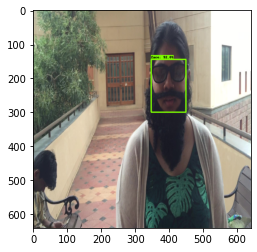

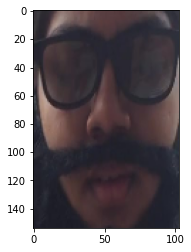

Running inference for /content/drive/My Drive/practical(Needed)/python/Face Detect Distinguise Full/test/1216.jpg... (640, 640, 3)


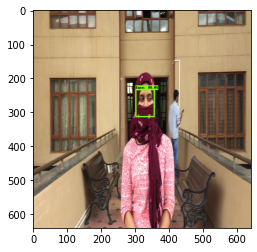

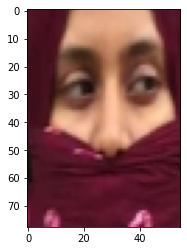

In [ ]:
%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt
import warnings
import cv2
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
      path: the file path to the image

    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))

IMAGE_PATHS = ['/content/drive/My Drive/practical(Needed)/python/Face Detect Distinguise Full/test/1000.jpg',\
               '/content/drive/My Drive/practical(Needed)/python/Face Detect Distinguise Full/test/1075.jpg',\
               '/content/drive/My Drive/practical(Needed)/python/Face Detect Distinguise Full/test/1216.jpg']

for image_path in IMAGE_PATHS:

    print('Running inference for {}... '.format(image_path), end='')

    image_np = load_image_into_numpy_array(image_path)
    image_np = cv2.resize(image_np,(640,640))

    

    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor = tf.convert_to_tensor(image_np)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis, ...]

    # input_tensor = np.expand_dims(image_np, 0)
    detections = detect_fn(input_tensor)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                   for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=200,
          min_score_thresh=.30,
          agnostic_mode=False)
    
    height,width,_ =  image_np.shape
    print(image_np.shape)
    boxes = detections['detection_boxes']
    b = boxes[0];
    xmin = int(b[1]*width)
    ymin = int(b[0]*height)
    xmax = int(b[3]*width)
    ymax = int(b[2]*height)

    cropped_image =  image_np[int(ymin):int(ymax), int(xmin):int(xmax)]
    
    plt.figure()
    plt.imshow(image_np_with_detections)
    plt.show()
    plt.imshow(cropped_image)
    plt.show()



In [ ]:
def face_fpn(image_path):
    # print('Running inference for {}... '.format(image_path), end='')

    image_np = load_image_into_numpy_array(image_path)
    image_np = cv2.resize(image_np,(640,640))

    

    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor = tf.convert_to_tensor(image_np)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis, ...]

    # input_tensor = np.expand_dims(image_np, 0)
    detections = detect_fn(input_tensor)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                   for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=200,
          min_score_thresh=.30,
          agnostic_mode=False)
    
    height,width,_ =  image_np.shape
    print('.',end='')
    boxes = detections['detection_boxes']
    b = boxes[0];
    xmin = int(b[1]*width)
    ymin = int(b[0]*height)
    xmax = int(b[3]*width)
    ymax = int(b[2]*height)

    cropped_image =  image_np[int(ymin):int(ymax), int(xmin):int(xmax)]

    return image_np,cropped_image

In [ ]:
import re

def natural_sort_key(s, _nsre=re.compile('([0-9]+)')):
    return [int(text) if text.isdigit() else text.lower()
            for text in _nsre.split(s)]    

In [ ]:
# import glob
# from PIL import Image
# import pandas as pd
# from IPython.display import clear_output





# trainpath = glob.glob('/content/drive/My Drive/practical(Needed)/python/Face Detect Distinguise Full/train/*jpg')
# trainpath.sort(key=natural_sort_key)

# PATH = '/content/drive/My Drive/practical(Needed)/python/Face Detect Distinguise Full/traincrop'


# for path in trainpath:
#     print('.',end='');
    
#     x = os.path.split(path)[1]
#     if(os.path.exists(PATH+'/'+x)):
#         continue;
        
#     img1,img2 = face_fpn(path)
#     im = Image.fromarray(img2)
#     im.save(PATH+'/'+x)




In [ ]:
deepface_model = keras.models.load_model('/content/drive/My Drive/practical(Needed)/python/Face Detect Distinguise Full/deepfaceDFI2.h5')

In [ ]:
import glob
from PIL import Image
import pandas as pd
from IPython.display import clear_output

testpath = glob.glob('/content/drive/My Drive/practical(Needed)/python/Face Detect Distinguise Full/test/*jpg')
testpath.sort(key=natural_sort_key)
imglist = []
for path in testpath:
    img1,img2 = face_fpn(path)
    img2 = cv2.resize(img2,(152,152))
    img2 = img2.astype(np.float32)
    img2/=255.0
    imglist.append(img2)


.............................................................................................................................................................................................................................................

In [ ]:
p = []
for item in testpath:
    x = os.path.split(item)[1]
    p.append(x)

In [ ]:
pred = deepface_model.predict(np.array(imglist),batch_size=32,verbose=1)

8/8 [==============================] - 1s 68ms/step


In [ ]:
pred  = pred.argmax(axis=1)

In [ ]:
pred = pred.tolist()

In [ ]:
df = pd.read_csv('/content/drive/My Drive/practical(Needed)/python/Face Detect Distinguise Full/LABELS.csv')
df2 = pd.read_csv('/content/drive/My Drive/practical(Needed)/python/Face Detect Distinguise Full/test.csv')

In [ ]:
persons = df['person'].tolist()
d  = {}
ls = []
coun = 0
for i in persons:
    if i not in d:
        d[i] = coun
        ls.append(i)
        coun+=1

In [ ]:
pred_string = [ls[i] for i in pred]

In [ ]:
truth_string = df2['person'].tolist()

In [ ]:
total = len(truth_string)
right = 0
for i,j in enumerate(truth_string):
    if(pred_string[i]==j):
        right+=1

In [ ]:
accuracy = (right/total)*100
accuracy

90.71729957805907

In [ ]:
force stop

NameError: ignored

In [ ]:
import pickle
with open('/content/drive/My Drive/practical(Needed)/python/Face Detect Distinguise Full/trainHistoryDict', 'rb') as f:
    dict1 = pickle.load(f)

with open('/content/drive/My Drive/practical(Needed)/python/Face Detect Distinguise Full/trainHistoryDict2', 'rb') as f:
    dict2 = pickle.load(f)

In [ ]:
hs = {}
hs['accuracy'] = dict1['accuracy'] + dict2['accuracy']
hs['loss'] = dict1['loss'] + dict2['loss']

In [ ]:

with open('/content/drive/My Drive/practical(Needed)/python/Face Detect Distinguise Full/trainHistoryDict', 'wb') as file_pi:
        pickle.dump(hs, file_pi)

dict_keys(['accuracy', 'loss'])


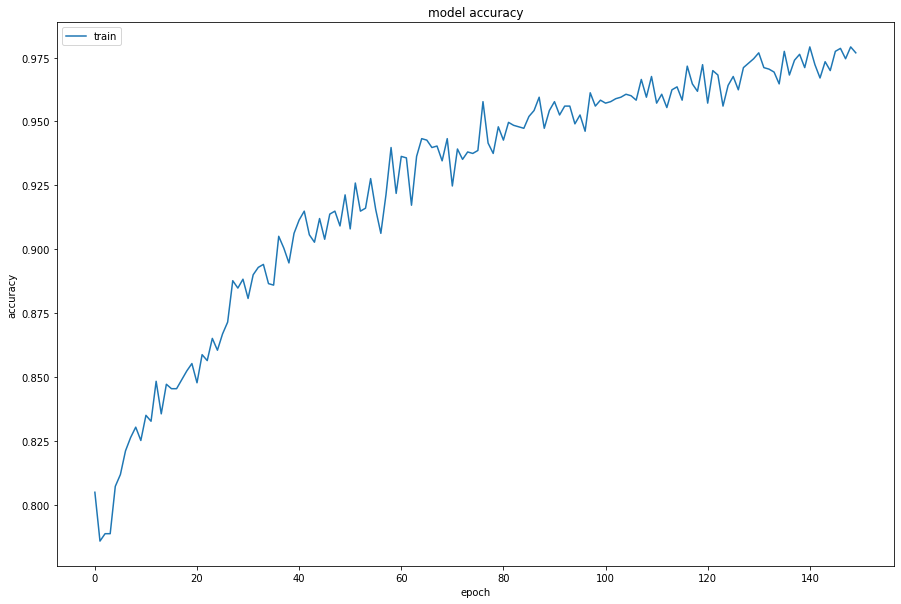

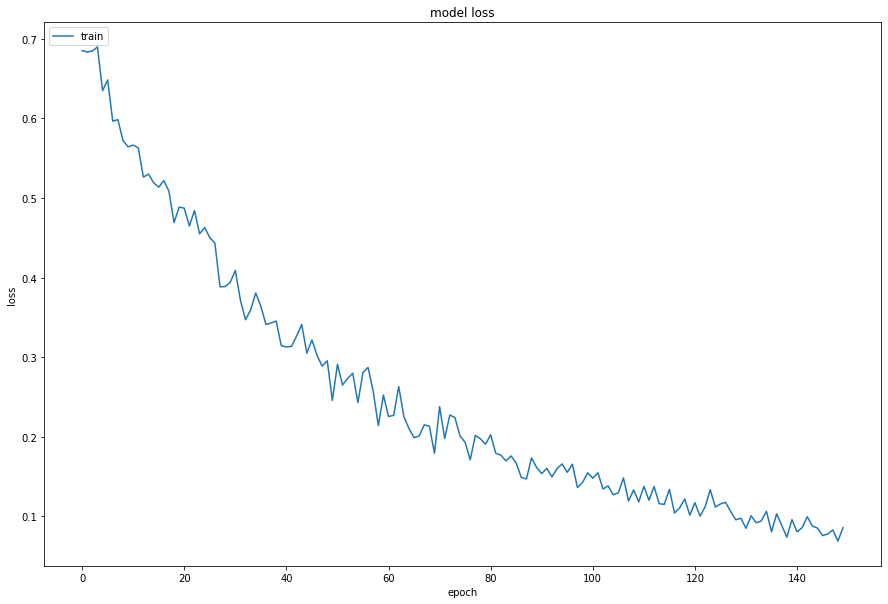

In [ ]:
print(hs.keys())
# summarize history for accuracy
plt.figure(figsize=(15,10))
plt.plot(hs['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(15,10))
plt.plot(hs['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()